# Exercice

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separate features and labels
X, y = mnist.data, mnist.target

# Convert labels to integers (optional, as they are strings by default)
y = y.astype(int)

print("Shape of X:", X.shape)  # (70000, 784) - 70,000 images, each with 784 pixels
print("Shape of y:", y.shape)  # (70000,) - Labels for each image


Shape of X: (70000, 784)
Shape of y: (70000,)


In [ ]:
some_digit = X[5]

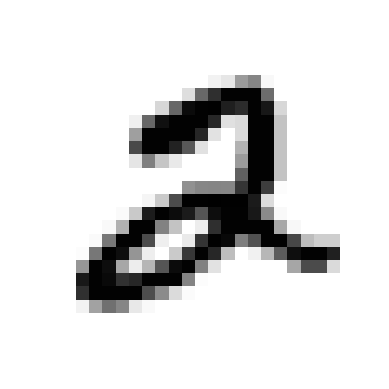

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation = 'nearest')
    plt.axis("off")

In [ ]:
# normalizing all pixel values for better model performance
X = X / 255.0


In [ ]:
# Splitting the DataSet into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knc.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(knc, X_train, y_train, cv = 5, scoring = 'accuracy') # 5-folds
score

array([0.96975   , 0.97016667, 0.96933333, 0.96816667, 0.969     ])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(knc, X_train, y_train, cv = 5, method ='predict')
# y_predict2 = cross_val_predict(knc, X_train, y_train, cv = 5, method ='decision_function')/
y_predict3 = cross_val_predict(knc, X_train, y_train, cv = 5, method ='predict_proba')
y_predict
# y_predict2
y_predict3

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# making Confusion Matrix For my code
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]])

In [ ]:
cnf = confusion_matrix(y_train, y_predict)


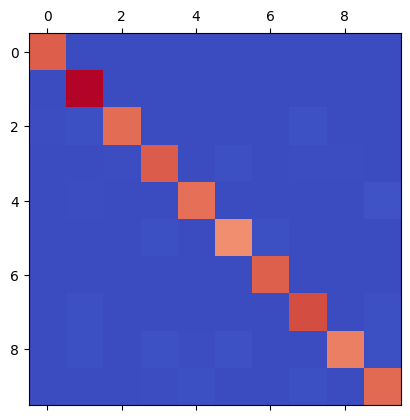

In [ ]:
plt.matshow(cnf, cmap = 'coolwarm')
plt.show()

In [ ]:
score.mean()

0.9692833333333335

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling the Train dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
y_predict_score = cross_val_score(knc, X_train, y_train, cv = 3, scoring='accuracy').mean()
y_predict_score

0.9674166666666667

#### Checking For precision - recall tradeoff using threshold

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_pred = cross_val_predict(knc,X_train,y_train, cv = 3)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = max(precision_score(y_train, y_pred, average='macro'), precision_score(y_train, y_pred, average = 'macro'))
precision

0.967895609653832

In [ ]:
recall = max(recall_score(y_train, y_pred, average='micro'), recall_score(y_train, y_pred, average = 'weighted'))
recall

0.9674166666666667

In [ ]:
f1Score = max(f1_score(y_train, y_pred, average='weighted'),f1_score(y_train, y_pred, average='micro'))
f1Score

0.9674166666666667

### Using Grid Search For Finding Best HyperParameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],   # Testing different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Uniform: all neighbors equal; Distance: closer neighbors have more weight
    # 'p': [1, 2]  # p=1 (Manhattan), p=2 (Euclidean)
}

In [ ]:
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,             # Defined hyperparameter grid
    cv=5,                              # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1                          # Use all processors for speed
)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation Score: 0.9711166666666665


In [ ]:
best_model = grid_search.best_estimator_  # Retrieve the best model
best_model


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.9717
